# Statistical view of Linear Regression


Linear Function is a constant relationship between a independent variable $x$ and dependent variable $y$ and is represented by a line $$ y = slope * x + intercept $$

## Lets see this

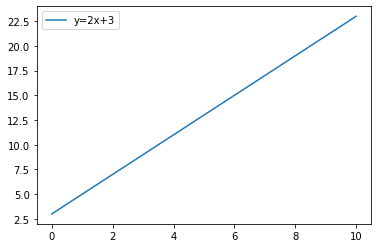

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10)
plt.plot(x, 2*x+3, ls='solid', label='y=2x+3')
plt.legend()
plt.show();

To get the intercept we set x = 0 in the formula which results 3 in this case. \
The another parameter is the slope. Slope is the steepness of the line. The slope is defined as rise over run. \
In this case we can see its 2.


## Now consider a case when we add random number to the value of the function \
$$ y = slope * x + random\ number $$

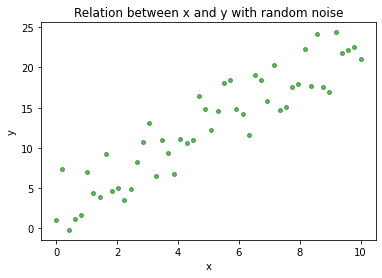

In [5]:
import random
np.random.seed(42)
x = np.linspace(0,10)
y_vals=[]
for i in range(len(x)):
    y_vals.append(2*x[i]+ 3 + random.randint(-4,4))
    
y = np.array(y_vals)

area = np.pi*5

plt.scatter(x,y,s=area, c='green', alpha=0.6)
plt.title('Relation between x and y with random noise')
plt.xlabel('x')
plt.ylabel('y');

Aas we see now data is not really a line, but it does show some linear behavior visually. This is somewhat representation of real world data.

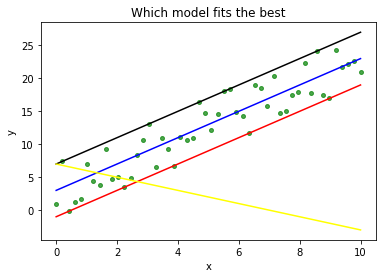

In [7]:
plt.scatter(x,y, s=area, c='green', alpha=0.7)
plt.plot(x, 2*x+3, ls='solid', c = 'b', label='y=2x+3')
plt.plot(x, 2*x-1, ls='solid', c= 'r',  label='y=2x-1')
plt.plot(x, 2*x+7, ls='solid', c = 'k', label='y=2x+7')
plt.plot(x, -x+7, ls='solid', c = 'yellow', label='y=-x+7')
plt.title('Which model fits the best')
plt.xlabel('x')
plt.ylabel('y');

## The goal is to determine this relationship,
* Is it Linear? 
* If so what is the best line which fits this data i.e. the best model to represent this data (red,black,blue or yellow)
* what is the criteria to choose the best model?
* What are the parameters of the model?

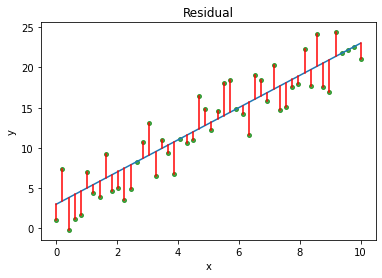

In [13]:
plt.scatter(x,y, s=area, c ='green', alpha=0.7)
plt.plot(x, 2*x+3, ls='solid', label='y=2x+3')

for i in range(len(x)):
    lineXdata = (x[i], x[i])
    lineYdata = ((2*x[i]+3),y[i])
    plt.plot(lineXdata, lineYdata, c='r')
    
plt.title('Residual')
plt.xlabel('x')
plt.ylabel('y');





In this plot, green dot are the data, and the model is blue line. The red lines are the residuals represent the distance between the data and the model. Intuitively, the samller the residuals the better the model is. Therefore, if we calculate all the residuals add them up, we can start looking for the slope and intercept that minimize the residuals.

## Probabilty and Linear regression 
* An interesting link between probability and linear model is that to apply this model to data you need to ensure that the distribution of the residuals is normal with constant variance. 
* If the data doesnt show this pattern, the linear model might not be a good fit.


### We can verify this by coding from scratch.

In [16]:
hours_of_study = np.array([4, 8, 8, 12, 8, 9, 6, 11, 13, 13, 19, 16, 17, 17, 21, 21, 23, 27, 30, 24])
scores = [52, 54, 61, 63, 63, 60, 61, 70, 75, 77, 76, 79, 81, 83, 85, 86, 88, 90, 95, 93]

# Import the linregress() function
from scipy.stats import linregress

slope, intercept, r_val, p_val, std_err = linregress(hours_of_study, scores)

print ('slope ', slope)
print ('Intercept ', intercept)

slope  1.715259850957089
Intercept  48.27076128780868


To implement the linear model we must study the residuals, which are the distances between the predicted outcomes and the data. \
Three conditions must be met. \
* The mean should be 0.
* The variance must be constant.
* The distribution must be normal.

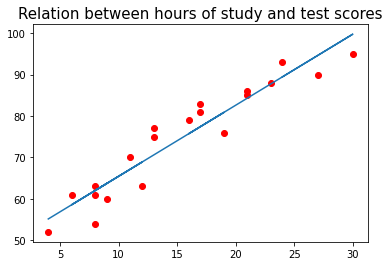

In [17]:
plt.scatter(hours_of_study, scores, c='r')

plt.plot(hours_of_study, slope*(hours_of_study) + intercept)
plt.title('Relation between hours of study and test scores', fontsize=15);

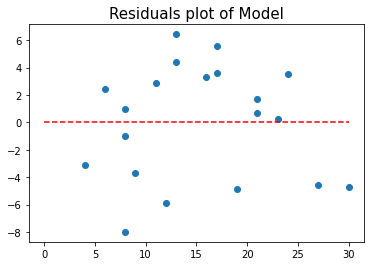

In [21]:
## Lets make a scatter plot of residuals

residuals = scores - (slope*(hours_of_study)+intercept)

plt.scatter(hours_of_study, residuals)

plt.hlines(0,0,30, colors='r', ls='--')
plt.title("Residuals plot of Model", fontsize=15);

## Lets take another datasets

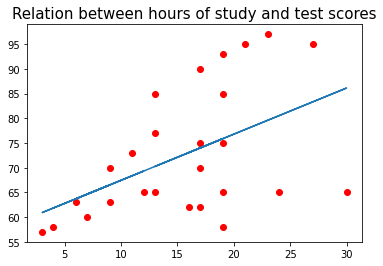

In [22]:
hours_of_study_2 = np.array([4, 9, 7, 12, 3, 9, 6, 11, 13, 13, 19, 16, 17, 17, 13, 21, 23, 27, 30, 24, 17, 17, 19, 19, 19, 19])
scores_2 = np.array([58, 70, 60, 65, 57, 63, 63, 73, 65, 77, 58, 62, 62, 90, 85, 95, 97, 95, 65, 65, 70, 75, 65, 75, 85, 93])

# Scatterplot of hours of study and test scores
plt.scatter(hours_of_study_2, scores_2, color='r')


# Get the model parameters
slope, intercept, r_value, p_value, std_err = linregress(hours_of_study_2, scores_2)


# Plot of hours_of_study and predicted values
plt.plot(hours_of_study_2, (slope * hours_of_study_2 + intercept))
plt.title("Relation between hours of study and test scores", fontsize=15);


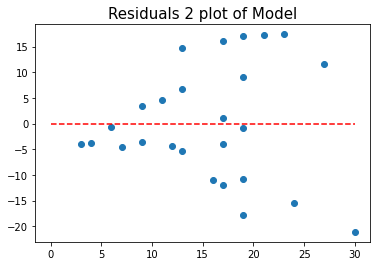

In [23]:
residuals_2 = scores_2 - (slope*(hours_of_study_2) + intercept)
plt.scatter(hours_of_study_2, residuals_2)

# Also add a reference line and title
plt.hlines(0, 0, 30, colors='r', linestyles='--')
plt.title("Residuals 2 plot of Model", fontsize=15);

After fitting a linear model, the residuals should look as in case 1. They should not have a structure. model_B shows a non-constant variance, and therefore the residual distribution is not normal. In those cases a linear model should not be trusted; your model could make really bad predictions!